# Introduction
In this notebook, I want to examine the neighborhoods in Los Angeles and cluster them based on similarities in terms of location and nearby services. Finally, with this information, I want to determine the following questions:

1. Which part of Los Angeles has the most venues
2. What category of venue is most common in LA
3. If I cluster LA venues into 5 groups, what does the clusters look like

# Data
The data I will use include:

- FourSqaure location data
- A list of Postal Codes in Los Angeles: https://www.geonames.org/postal-codes/US/CA/california.html

**Postal Code Data**

In [1]:
import pandas as pd

url = 'https://www.geonames.org/postal-codes/US/CA/california.html'
dfs = pd.read_html(url)

In [2]:
dfs[2]

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Beverly Hills,90210,United States,California,Los Angeles,NaN
1,NaN,34.09/-118.406,34.09/-118.406,34.09/-118.406,34.09/-118.406,34.09/-118.406,34.09/-118.406
2,2.0,Los Angeles,90002,United States,California,Los Angeles,NaN
3,NaN,33.95/-118.246,33.95/-118.246,33.95/-118.246,33.95/-118.246,33.95/-118.246,33.95/-118.246
4,3.0,Los Angeles,90003,United States,California,Los Angeles,NaN
...,...,...,...,...,...,...,...
396,199.0,Santa Monica,90406,United States,California,Los Angeles,NaN
397,NaN,34.019/-118.491,34.019/-118.491,34.019/-118.491,34.019/-118.491,34.019/-118.491,34.019/-118.491
398,200.0,Santa Monica,90407,United States,California,Los Angeles,NaN
399,NaN,34.019/-118.491,34.019/-118.491,34.019/-118.491,34.019/-118.491,34.019/-118.491,34.019/-118.491


**Data Wrangling**

We can see that Pandas is putting the longitude and latitude of each location into a separate row. Also, we can see pandas read in two redundant columns Unnamed: 0 and Admin3, which we also will drop. Lastly, we want to change the names of columns Admin 1 and 2 to more descriptive titles. Let's fix these issues.

In [3]:
dfs[2][dfs[2].index % 2 != 0]

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
1,NaN,34.09/-118.406,34.09/-118.406,34.09/-118.406,34.09/-118.406,34.09/-118.406,34.09/-118.406
3,NaN,33.95/-118.246,33.95/-118.246,33.95/-118.246,33.95/-118.246,33.95/-118.246,33.95/-118.246
5,NaN,33.965/-118.273,33.965/-118.273,33.965/-118.273,33.965/-118.273,33.965/-118.273,33.965/-118.273
7,NaN,34.076/-118.303,34.076/-118.303,34.076/-118.303,34.076/-118.303,34.076/-118.303,34.076/-118.303
9,NaN,34.049/-118.292,34.049/-118.292,34.049/-118.292,34.049/-118.292,34.049/-118.292,34.049/-118.292
...,...,...,...,...,...,...,...
391,NaN,33.962/-118.353,33.962/-118.353,33.962/-118.353,33.962/-118.353,33.962/-118.353,33.962/-118.353
393,NaN,33.962/-118.353,33.962/-118.353,33.962/-118.353,33.962/-118.353,33.962/-118.353,33.962/-118.353
395,NaN,34.035/-118.503,34.035/-118.503,34.035/-118.503,34.035/-118.503,34.035/-118.503,34.035/-118.503
397,NaN,34.019/-118.491,34.019/-118.491,34.019/-118.491,34.019/-118.491,34.019/-118.491,34.019/-118.491


In [4]:
coor_list = dfs[2][dfs[2].index % 2 != 0]['Place']

coor_list

1       34.09/-118.406
3       33.95/-118.246
5      33.965/-118.273
7      34.076/-118.303
9      34.049/-118.292
            ...       
391    33.962/-118.353
393    33.962/-118.353
395    34.035/-118.503
397    34.019/-118.491
399    34.019/-118.491
Name: Place, Length: 200, dtype: object

In [5]:
dfs[2] = dfs[2].iloc[::2]

dfs[2]

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Beverly Hills,90210,United States,California,Los Angeles,NaN
2,2.0,Los Angeles,90002,United States,California,Los Angeles,NaN
4,3.0,Los Angeles,90003,United States,California,Los Angeles,NaN
6,4.0,Los Angeles,90004,United States,California,Los Angeles,NaN
8,5.0,Los Angeles,90006,United States,California,Los Angeles,NaN
...,...,...,...,...,...,...,...
392,197.0,Inglewood,90312,United States,California,Los Angeles,NaN
394,198.0,Santa Monica,90402,United States,California,Los Angeles,NaN
396,199.0,Santa Monica,90406,United States,California,Los Angeles,NaN
398,200.0,Santa Monica,90407,United States,California,Los Angeles,NaN


In [6]:
dfs[2] = dfs[2].reset_index(drop=True)

dfs[2]

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Beverly Hills,90210,United States,California,Los Angeles,NaN
1,2.0,Los Angeles,90002,United States,California,Los Angeles,NaN
2,3.0,Los Angeles,90003,United States,California,Los Angeles,NaN
3,4.0,Los Angeles,90004,United States,California,Los Angeles,NaN
4,5.0,Los Angeles,90006,United States,California,Los Angeles,NaN
...,...,...,...,...,...,...,...
196,197.0,Inglewood,90312,United States,California,Los Angeles,NaN
197,198.0,Santa Monica,90402,United States,California,Los Angeles,NaN
198,199.0,Santa Monica,90406,United States,California,Los Angeles,NaN
199,200.0,Santa Monica,90407,United States,California,Los Angeles,NaN


In [7]:
dfs[2] = dfs[2].drop('Unnamed: 0', axis=1)
dfs[2] = dfs[2].drop('Admin3', axis=1)

dfs[2]

,Place,Code,Country,Admin1,Admin2
0,Beverly Hills,90210,United States,California,Los Angeles
1,Los Angeles,90002,United States,California,Los Angeles
2,Los Angeles,90003,United States,California,Los Angeles
3,Los Angeles,90004,United States,California,Los Angeles
4,Los Angeles,90006,United States,California,Los Angeles
...,...,...,...,...,...
196,Inglewood,90312,United States,California,Los Angeles
197,Santa Monica,90402,United States,California,Los Angeles
198,Santa Monica,90406,United States,California,Los Angeles
199,Santa Monica,90407,United States,California,Los Angeles


In [8]:
dfs[2] = dfs[2].drop(dfs[2].tail(1).index)

dfs[2]

,Place,Code,Country,Admin1,Admin2
0,Beverly Hills,90210,United States,California,Los Angeles
1,Los Angeles,90002,United States,California,Los Angeles
2,Los Angeles,90003,United States,California,Los Angeles
3,Los Angeles,90004,United States,California,Los Angeles
4,Los Angeles,90006,United States,California,Los Angeles
...,...,...,...,...,...
195,Inglewood,90311,United States,California,Los Angeles
196,Inglewood,90312,United States,California,Los Angeles
197,Santa Monica,90402,United States,California,Los Angeles
198,Santa Monica,90406,United States,California,Los Angeles


In [9]:
latitudes, longitudes = zip(*(s.split('/') for s in coor_list))

We can see from the data that the longitudes are negative, which suggest the website we fetched the data from used degree East for longitudes. Let's remember this and see later if we need to reformat the data.

In [10]:
dfs[2]['latitudes(degree North)'] = latitudes
dfs[2]['longitudes(degree East)'] = longitudes

dfs[2]['latitudes(degree North)'] = pd.to_numeric(dfs[2]['latitudes(degree North)'])
dfs[2]['longitudes(degree East)'] = pd.to_numeric(dfs[2]['longitudes(degree East)'])

dfs[2]

,Place,Code,Country,Admin1,Admin2,latitudes(degree North),longitudes(degree East)
0,Beverly Hills,90210,United States,California,Los Angeles,34.090,-118.406
1,Los Angeles,90002,United States,California,Los Angeles,33.950,-118.246
2,Los Angeles,90003,United States,California,Los Angeles,33.965,-118.273
3,Los Angeles,90004,United States,California,Los Angeles,34.076,-118.303
4,Los Angeles,90006,United States,California,Los Angeles,34.049,-118.292
...,...,...,...,...,...,...,...
195,Inglewood,90311,United States,California,Los Angeles,33.962,-118.353
196,Inglewood,90312,United States,California,Los Angeles,33.962,-118.353
197,Santa Monica,90402,United States,California,Los Angeles,34.035,-118.503
198,Santa Monica,90406,United States,California,Los Angeles,34.019,-118.491


Awesome! Now we have all the geographical data we need. Let's rename the Admin1 and Admin2 columns and save the data into a more descriptive variable.

In [11]:
la_neighborhoods = dfs[2].rename(columns={'Admin1': 'State', 'Admin2': 'City'})

la_neighborhoods

,Place,Code,Country,State,City,latitudes(degree North),longitudes(degree East)
0,Beverly Hills,90210,United States,California,Los Angeles,34.090,-118.406
1,Los Angeles,90002,United States,California,Los Angeles,33.950,-118.246
2,Los Angeles,90003,United States,California,Los Angeles,33.965,-118.273
3,Los Angeles,90004,United States,California,Los Angeles,34.076,-118.303
4,Los Angeles,90006,United States,California,Los Angeles,34.049,-118.292
...,...,...,...,...,...,...,...
195,Inglewood,90311,United States,California,Los Angeles,33.962,-118.353
196,Inglewood,90312,United States,California,Los Angeles,33.962,-118.353
197,Santa Monica,90402,United States,California,Los Angeles,34.035,-118.503
198,Santa Monica,90406,United States,California,Los Angeles,34.019,-118.491


**FourSquare Data**

In [12]:
pip install geocoder

     |████████████████████████████████| 102kB 3.8MB/s 


In [13]:
import geocoder
from geopy.geocoders import Nominatim 

address = 'Los Angeles, California'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.242766.


# Exploratory Data Analysis

**Distribution of Locations**

In [14]:
import folium

map_la = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(la_neighborhoods['latitudes(degree North)'], la_neighborhoods['longitudes(degree East)'], la_neighborhoods['Place']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  
    
map_la

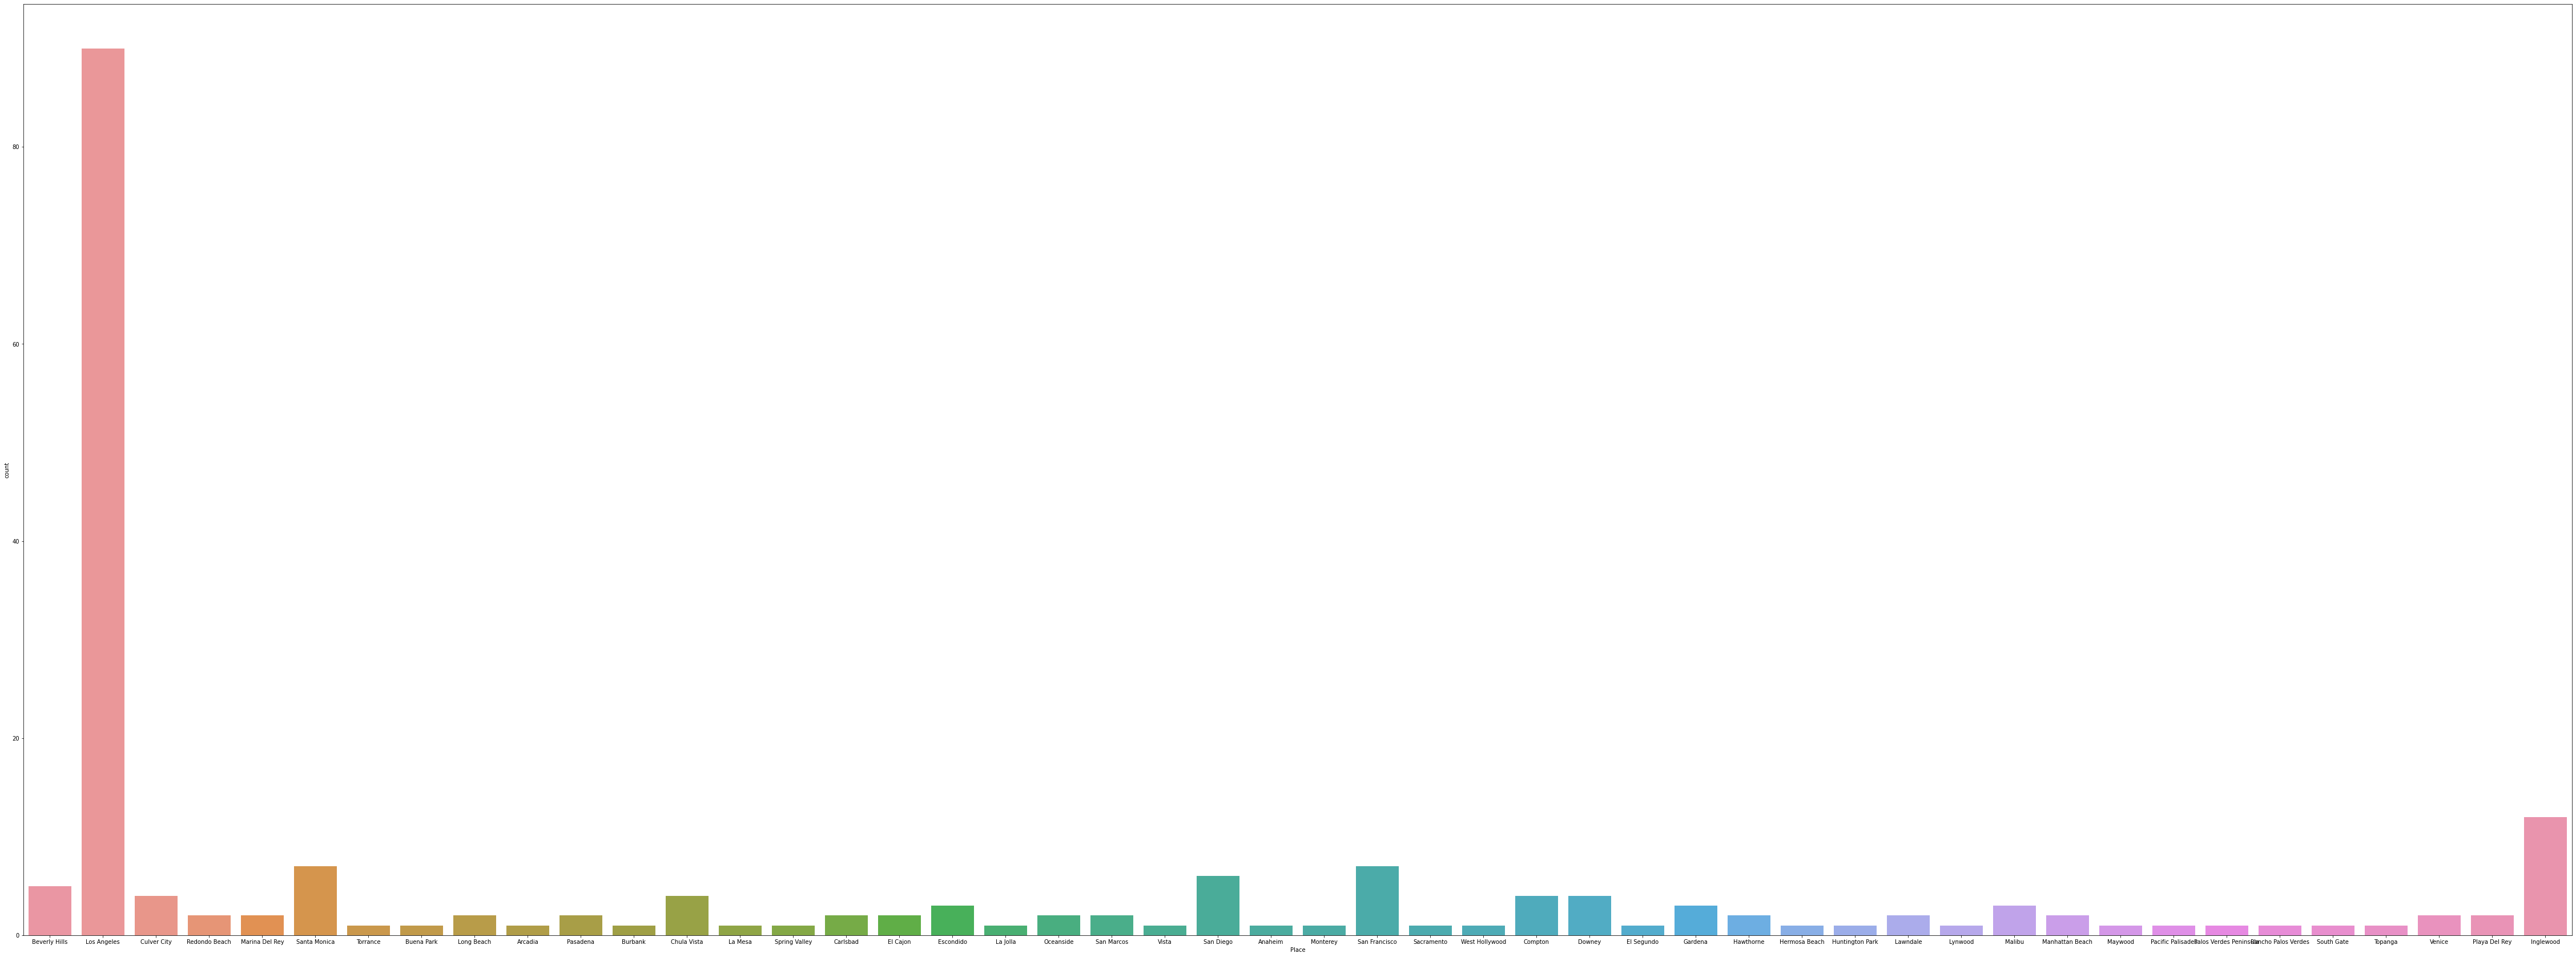

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(80, 30))
sns.countplot(x=la_neighborhoods['Place'])

**FourSquare Credentials**

In [16]:
CLIENT_ID = 'ETHN0R5XOJAAJENV4MDYBUT55TKFM5GOEL0SXAXEHOHOOR3W'
CLIENT_SECRET = '0GXI3BRZ2EYH1QCSVHRA2CK53K2LLCNMQ5XZSXVMYH44KAJL'
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ETHN0R5XOJAAJENV4MDYBUT55TKFM5GOEL0SXAXEHOHOOR3W
CLIENT_SECRET:0GXI3BRZ2EYH1QCSVHRA2CK53K2LLCNMQ5XZSXVMYH44KAJL


**Explore the first location**

Just for curiosity, let's explore the first location in our data

In [17]:
la_neighborhoods.loc[0, 'Place']

'Beverly Hills'

In [18]:
neighborhood_latitude = la_neighborhoods.loc[0, 'latitudes(degree North)'] # neighborhood latitude value
neighborhood_longitude = la_neighborhoods.loc[0, 'longitudes(degree East)'] # neighborhood longitude value

neighborhood_name = la_neighborhoods.loc[0, 'Place'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, neighborhood_latitude, neighborhood_longitude))

Latitude and longitude values of Beverly Hills are 34.09, -118.406.


**Top 5 venues that are in Beverley Hills within a radius of 500 meters.**

In [19]:
LIMIT = 5
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [20]:
import json
import requests

results = requests.get(url).json()

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,The Official site of Gerard Harrison,Bookstore,34.090100,-118.406500
1,P.B.S.,Speakeasy,34.088916,-118.406128
2,Custom Kilt,Clothing Store,34.088350,-118.404041
3,Zaino tennis courts,Tennis Court,34.093415,-118.403693
4,Greystone,Park,34.092035,-118.401520


**Nearby Venues in LA**

Now, let us generalize our finding to entire LA

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        if requests.get(url).json() != None:
          results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [23]:
la_venues = getNearbyVenues(names=la_neighborhoods['Place'],
                                   latitudes=la_neighborhoods['latitudes(degree North)'],
                                   longitudes=la_neighborhoods['longitudes(degree East)']
                                  )

Beverly Hills
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Beverly Hills
Culver City
Redondo Beach
Marina Del Rey
Santa Monica
Santa Monica
Santa Monica
Santa Monica
Torrance
Buena Park
Long Beach
Long Beach
Arcadia
Pasadena
Pasadena
Burbank
Chula Vista
Chula Vista
Chula Vista
Chula Vista
La Mesa
Spring Valley
Carlsbad
Carlsbad
El Cajon
El Cajon
Escondido
Escondido
Escondido
La Jolla
Oceanside
Oceanside
San Marcos
San Marcos
Vista
San Diego
San Diego
San Diego
San Diego
San Diego
San Diego
Anaheim
Monterey
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
Sacramento
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los 

**Examine the Result**

Now we have collected a list of venues in LA. Let's first check if our data is clean

In [24]:
print(la_venues.isna().sum())

Neighbourhood             0
Neighborhood Latitude     0
Neighborhood Longitude    0
Venue                     0
Venue Latitude            0
Venue Longitude           0
Venue Category            0
dtype: int64


Cool, it seems like we don't have any missing values. Let's now take a look at the venues in LA

In [25]:
la_venues.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beverly Hills,34.09,-118.406,The Official site of Gerard Harrison,34.090100,-118.406500,Bookstore
1,Beverly Hills,34.09,-118.406,P.B.S.,34.088916,-118.406128,Speakeasy
2,Beverly Hills,34.09,-118.406,Custom Kilt,34.088350,-118.404041,Clothing Store
3,Beverly Hills,34.09,-118.406,Zaino tennis courts,34.093415,-118.403693,Tennis Court
4,Beverly Hills,34.09,-118.406,Greystone,34.092035,-118.401520,Park


1. Size of the resulting dataframe

In [26]:
print(la_venues.shape)

(897, 7)


2. Categories of venues

In [27]:
print('There are {} uniques categories.'.format(len(la_venues['Venue Category'].unique())))
print()
print(la_venues['Venue Category'].unique())

There are 193 uniques categories.

['Bookstore' 'Speakeasy' 'Clothing Store' 'Tennis Court' 'Park'
 'Sushi Restaurant' 'Mexican Restaurant' 'Cocktail Bar' 'Spa'
 'Video Game Store' 'Diner' 'Ice Cream Shop' 'Korean Restaurant'
 'Cajun / Creole Restaurant' 'Sandwich Place' 'Fried Chicken Joint'
 'Coffee Shop' 'Chinese Restaurant' 'Massage Studio' 'Steakhouse'
 'Rock Club' 'Bar' 'Burger Joint' 'Market' 'Skate Park' 'Home Service'
 'Pizza Place' 'Asian Restaurant' 'Garden' 'Hotel' 'College Theater'
 'Supermarket' 'Indie Movie Theater' 'Japanese Restaurant'
 'Recording Studio' 'Video Store' 'Ramen Restaurant'
 'Gym / Fitness Center' 'Art Gallery' 'Gastropub' 'Bakery' 'Café'
 'Juice Bar' 'Lounge' 'Italian Restaurant' 'Middle Eastern Restaurant'
 'Dessert Shop' 'Donut Shop' 'Pharmacy' 'Vegetarian / Vegan Restaurant'
 'Kosher Restaurant' 'French Restaurant' 'Furniture / Home Store'
 'Boxing Gym' 'Gym' 'Residential Building (Apartment / Condo)'
 'Music Venue' 'Climbing Gym' 'Grocery Store' 'Liq

The category column doesn't really do a nice job. We see that many categories are all resturants, but the api still puts them in separate categories. 

3. Location of venues

In [28]:
la_venues.groupby('Neighbourhood').size().sort_values(ascending=False)

Neighbourhood
Los Angeles               407
Inglewood                  58
San Francisco              35
Santa Monica               34
San Diego                  29
Beverly Hills              25
Culver City                20
Compton                    19
Downey                     17
Gardena                    13
Chula Vista                13
Escondido                  12
Malibu                     11
Manhattan Beach            10
Redondo Beach              10
San Marcos                 10
Playa Del Rey              10
Long Beach                 10
Lawndale                   10
Hawthorne                  10
Venice                     10
Marina Del Rey             10
Pasadena                    9
El Segundo                  5
El Cajon                    5
Huntington Park             5
Carlsbad                    5
Burbank                     5
Arcadia                     5
Hermosa Beach               5
West Hollywood              5
Anaheim                     5
La Mesa                   

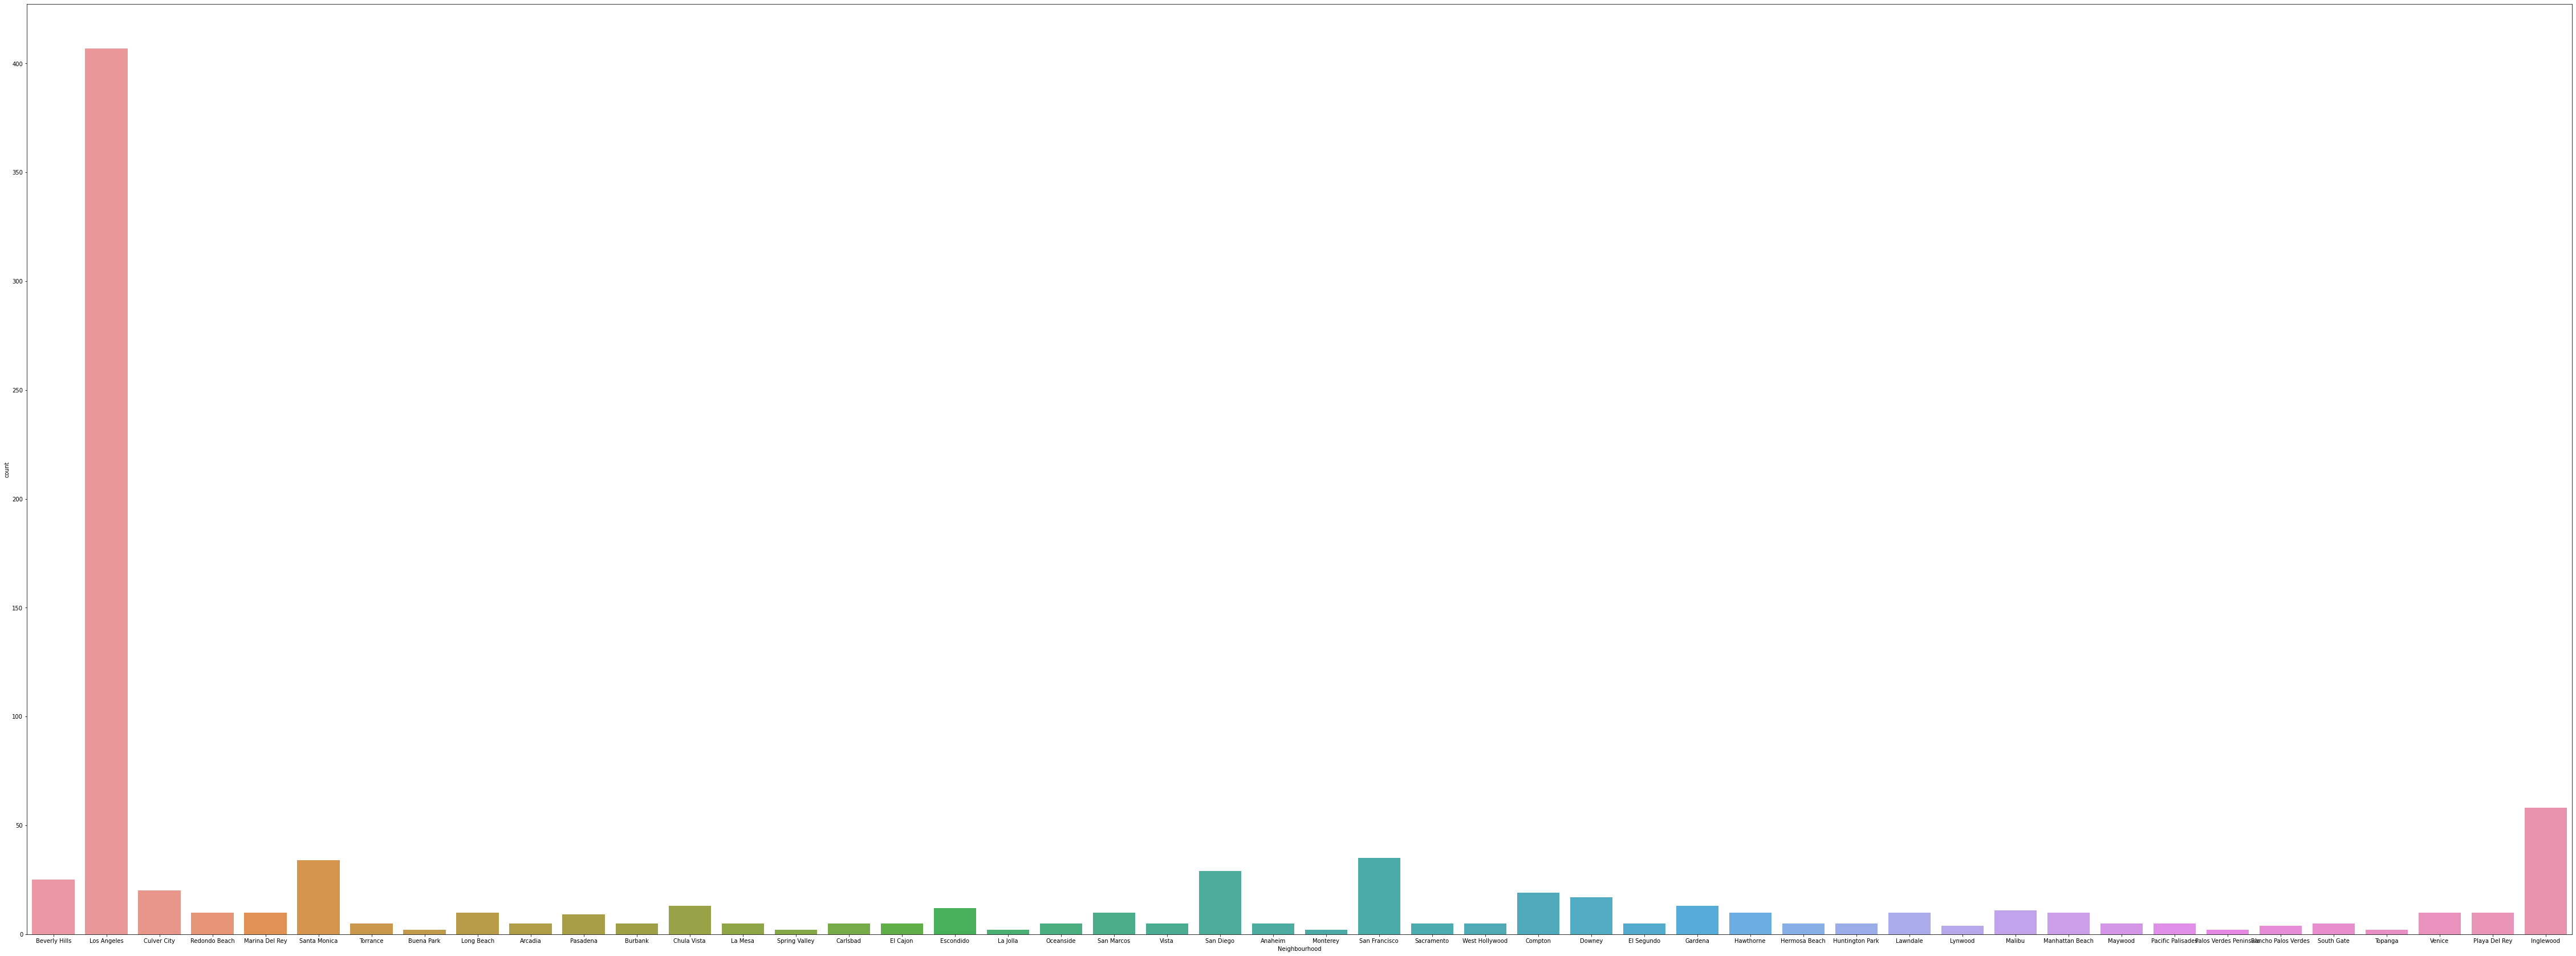

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(80, 30))
sns.countplot(x=la_venues['Neighbourhood'])

We see that most venues are located in LA and then in Inglewood and then other places.And in fact LA surpasses other places by a lot

# Neighborhood Clustering

Now, I will use K-Means to cluster the locations into 5 groups

In [30]:
la_onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
la_onehot['Neighbourhood'] = la_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
manhattan_onehot = la_onehot[fixed_columns]

la_onehot.head()

,ATM,Accessories Store,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beer Bar,Big Box Store,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Climbing Gym,...,Shipping Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,State / Provincial Park,Stationery Store,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beverly Hills
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beverly Hills
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beverly Hills
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beverly Hills
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beverly Hills


In [31]:
la_onehot.shape

(897, 194)

In [32]:
la_grouped = la_onehot.groupby('Neighbourhood').mean().reset_index()
la_grouped

,Neighbourhood,ATM,Accessories Store,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beer Bar,Big Box Store,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,...,Seafood Restaurant,Shipping Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,State / Provincial Park,Stationery Store,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Anaheim,0.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arcadia,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.200000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Beverly Hills,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.040000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.040000,0.000000,0.040000,0.00,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.0,0.080000,0.000000,0.000000,0.04,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000
3,Buena Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Burbank,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00

In [33]:
la_grouped.shape

(48, 194)

In [34]:
num_top_venues = 5

for hood in la_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = la_grouped[la_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anaheim----
              venue  freq
0  Toy / Game Store   0.4
1       Art Gallery   0.2
2             Hotel   0.2
3    Shopping Plaza   0.2
4               ATM   0.0


----Arcadia----
                venue  freq
0     Thai Restaurant   0.2
1      Discount Store   0.2
2      Sandwich Place   0.2
3  Mexican Restaurant   0.2
4              Bakery   0.2


----Beverly Hills----
                   venue  freq
0                   Café  0.12
1     Italian Restaurant  0.08
2  Performing Arts Venue  0.08
3               Wine Bar  0.08
4       Sushi Restaurant  0.08


----Buena Park----
                     venue  freq
0        Convenience Store   0.5
1            Historic Site   0.5
2                      ATM   0.0
3                 Pharmacy   0.0
4  New American Restaurant   0.0


----Burbank----
                  venue  freq
0  Other Great Outdoors   0.2
1        Cosmetics Shop   0.2
2           Coffee Shop   0.2
3                  Café   0.2
4           Candy Store   0.2


----Carlsbad-

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
import numpy as np 

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
la_venues_sorted = pd.DataFrame(columns=columns)
la_venues_sorted['Neighbourhood'] = la_grouped['Neighbourhood']

for ind in np.arange(la_grouped.shape[0]):
    la_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

la_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anaheim,Toy / Game Store,Hotel,Art Gallery,Shopping Plaza,Yoga Studio,Electronics Store,Food Court,Food & Drink Shop,Food,Flower Shop
1,Arcadia,Thai Restaurant,Bakery,Mexican Restaurant,Discount Store,Sandwich Place,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop
2,Beverly Hills,Café,Performing Arts Venue,Wine Bar,Farmers Market,Italian Restaurant,Sushi Restaurant,Speakeasy,Tennis Court,Park,Clothing Store
3,Buena Park,Convenience Store,Historic Site,Electronics Store,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant
4,Burbank,Cosmetics Shop,Candy Store,Coffee Shop,Other Great Outdoors,Café,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop


In [37]:
from sklearn.cluster import KMeans

kclusters = 5

la_grouped_clustering = la_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 1, 3, 2, 2, 2], dtype=int32)

In [ ]:
# add clustering labels
la_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [49]:
la_merged = la_neighborhoods

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
la_merged = la_merged.join(la_venues_sorted.set_index('Neighbourhood'), on='Place')

la_merged.head() # check the last columns!

,Place,Code,Country,State,City,latitudes(degree North),longitudes(degree East),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beverly Hills,90210,United States,California,Los Angeles,34.090,-118.406,2,Café,Performing Arts Venue,Wine Bar,Farmers Market,Italian Restaurant,Sushi Restaurant,Speakeasy,Tennis Court,Park,Clothing Store
1,Los Angeles,90002,United States,California,Los Angeles,33.950,-118.246,2,American Restaurant,Bookstore,Speakeasy,Indian Restaurant,Jazz Club,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Grocery Store,Pharmacy
2,Los Angeles,90003,United States,California,Los Angeles,33.965,-118.273,2,American Restaurant,Bookstore,Speakeasy,Indian Restaurant,Jazz Club,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Grocery Store,Pharmacy
3,Los Angeles,90004,United States,California,Los Angeles,34.076,-118.303,2,American Restaurant,Bookstore,Speakeasy,Indian Restaurant,Jazz Club,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Grocery Store,Pharmacy
4,Los Angeles,90006,United States,California,Los Angeles,34.049,-118.292,2,American Restaurant,Bookstore,Speakeasy,Indian Restaurant,Jazz Club,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Grocery Store,Pharmacy


In [50]:
la_merged['Cluster Labels'] = la_merged['Cluster Labels'].fillna(0)

In [52]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_merged['latitudes(degree North)'], la_merged['longitudes(degree East)'], la_merged['Place'], la_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Conclusion

From this analysis, we see that 
1. Most venues are located in Los Angeles, then Inglewoord, then other places
2. Although the category for each venue isn't general enough, it seems like resturant is the most common venue in LA
3. The above map illustrates how the cluster looks like